<a href="https://colab.research.google.com/github/Svarich-11908/machine-learning/blob/main/11_009_Svarich_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ДЗ №13**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

%matplotlib inline

In [12]:
url='https://drive.google.com/uc?id=1A1yUoUgtuYa_71-MJO50z4YVymYZxien'
data = pd.read_csv(url, header=None)
data

,0,1
0,1/1/2017,"22,226.00"
1,1/2/2017,"29,593.00"
2,1/3/2017,"31,726.00"
3,1/4/2017,"32,684.00"
4,1/5/2017,"31,820.00"
...,...,...
1090,12/27/2019,"29,801.00"
1091,12/28/2019,"34,913.00"
1092,12/29/2019,"37,665.00"
1093,12/30/2019,"32,643.00"


In [13]:
data[1] = list(map(lambda x: float(x.replace(',','')), data[1]))

Len = 60
n_features = 300
batch_size = 20

trainLen = data.shape[0]-n_features

xTrain, xTest = data[:trainLen], data[trainLen+Len+2:]

xScaler = MinMaxScaler()
xScaler.fit(xTrain[1].values.reshape((-1, 1)))
xTrain = xScaler.transform(xTrain[1].values.reshape((-1, 1)))
xTest = xScaler.transform(xTest[1].values.reshape((-1, 1)))

trainDataGen = TimeseriesGenerator(xTrain, xTrain,length=Len, sampling_rate=1,batch_size=batch_size,stride = 1)

testDataGen = TimeseriesGenerator(xTest, xTest,length=Len, sampling_rate=1,batch_size=batch_size,stride = 1)

Epoch 1/60
37/37 [==============================] - 48s 123ms/step - loss: 0.0881 - val_loss: 0.0440
Epoch 2/60
37/37 [==============================] - 5s 138ms/step - loss: 0.0194 - val_loss: 0.0223
Epoch 3/60
37/37 [==============================] - 3s 88ms/step - loss: 0.0178 - val_loss: 0.0206
Epoch 4/60
37/37 [==============================] - 3s 88ms/step - loss: 0.0136 - val_loss: 0.0114
Epoch 5/60
37/37 [==============================] - 4s 100ms/step - loss: 0.0146 - val_loss: 0.0370
Epoch 6/60
37/37 [==============================] - 3s 84ms/step - loss: 0.0116 - val_loss: 0.0140
Epoch 7/60
37/37 [==============================] - 3s 88ms/step - loss: 0.0119 - val_loss: 0.0160
Epoch 8/60
37/37 [==============================] - 3s 87ms/step - loss: 0.0098 - val_loss: 0.0246
Epoch 9/60
37/37 [==============================] - 3s 84ms/step - loss: 0.0153 - val_loss: 0.0225
Epoch 10/60
37/37 [==============================] - 4s 94ms/step - loss: 0.0132 - val_loss: 0.0155
Epoch

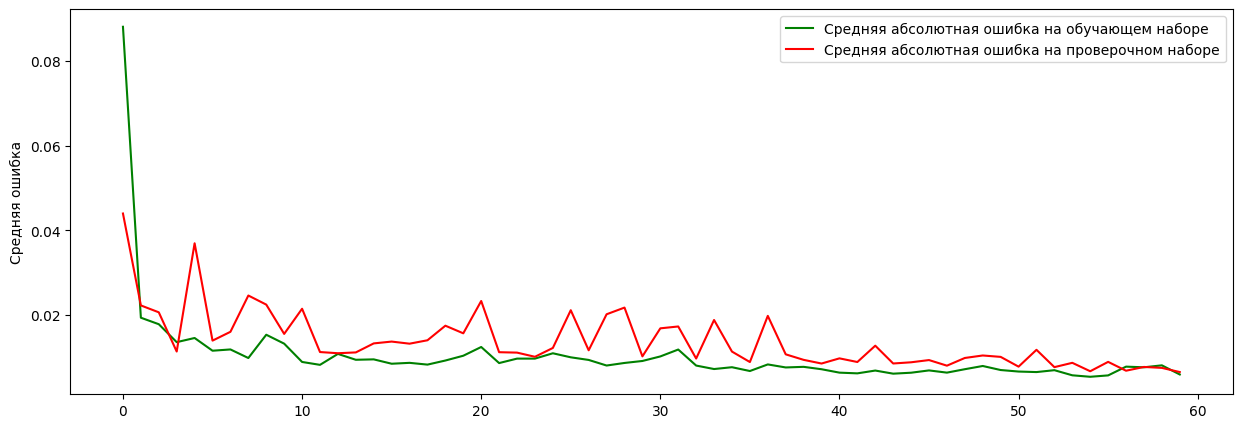

In [15]:
model = Sequential()
model.add(LSTM(100,input_shape=(Len, 1), return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='linear'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(trainDataGen,epochs=60,verbose=1,validation_data = testDataGen)

plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Средняя абсолютная ошибка на обучающем наборе', color='green')
plt.plot(history.history['val_loss'], label='Средняя абсолютная ошибка на проверочном наборе', color='red')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

9/9 [==============================] - 0s 24ms/step


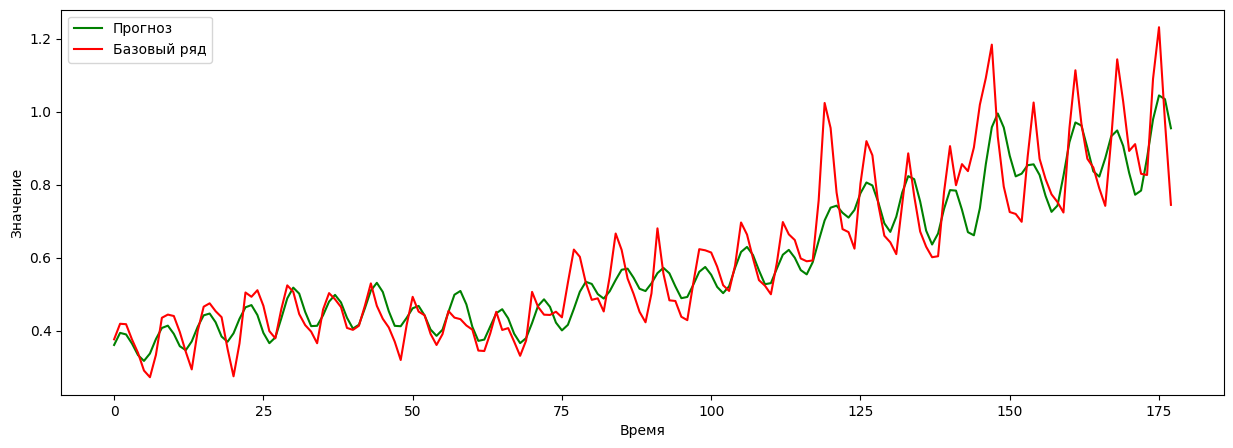

In [17]:
plt.figure(figsize=(15, 5))
pred = model.predict(testDataGen)
plt.plot(pred , label='Прогноз', color='green')
plt.plot(xTest[Len:], label='Базовый ряд', color='red')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()